In [3]:
import numpy as np
import matplotlib.pyplot as plt

## **Univariate**

In [4]:
def univariateFx (x):
    return x**2 - 4*x + 4

In [5]:
def gradient_descent (inital_x, learning_rate, num_iterations):
    x = inital_x
    gradients = []
    for i in range(num_iterations):
        gradient = 2*x - 4
        x = x - learning_rate * gradient
        gradients.append(x)
    return gradients

In [6]:
initial_x = 0
learning_rate = 0.1
num_iterations = 100

gradients = gradient_descent(initial_x, learning_rate, num_iterations)
gradients[-1]

1.9999999995925928

In [7]:
final_value = univariateFx(gradients[-1])
final_value

0.0

## **Multivariate**

In [8]:
def multivariateFx (x, y):
    return x**2 + 3 * y**2 + 4*x*y + 5

In [9]:
def gradient_descent (inital_x, inital_y, learning_rate, num_iterations):
    x = inital_x
    y = inital_y
    gradients = []
    for i in range(num_iterations):
        gradient_x = 2*x + 4*y
        gradient_y = 6*y + 4*x
        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y
        gradients.append((x,y))
    return gradients

In [10]:
initial_x = 1
initial_y = -1
learning_rate = 0.1
num_iterations = 100

gradients = gradient_descent(initial_x, initial_y, learning_rate, num_iterations)
gradients[-1]

(118.03680922510642, -72.9507600247029)

In [11]:
# gradients[-1][0], gradients[-1][1]
final_value = multivariateFx(gradients[-1][0], gradients[-1][1])
final_value

-4540.371278859966

## **Adaptive learning Rate**

In [12]:
def adaptivelearningRate (x):
    return 0.1 * x**4 - 2.5 * x**3 + 2 * x**2 + 8 * x

In [13]:
def gradient_descent (inital_x, learning_rate, num_iterations):
    x = inital_x
    gradients = []
    for i in range(num_iterations):
        gradient = 0.1 * 4 * x**3 -2.5 * 3 * x**2 + 2 * 2 * x + 8
        x = x - learning_rate * gradient
        learning_rate = learning_rate/(i+2)
        gradients.append([i, x])
    return gradients

In [14]:
initial_x = 0
learning_rate = 0.1
num_iterations = 20

gradients = gradient_descent(initial_x, learning_rate, num_iterations)
gradients[-1]

[19, -0.7890684680783373]

In [15]:
history = [row[0] for row in gradients]
steps = [row[1] for row in gradients]

Text(0.5, 1.0, 'Gradient Descent')

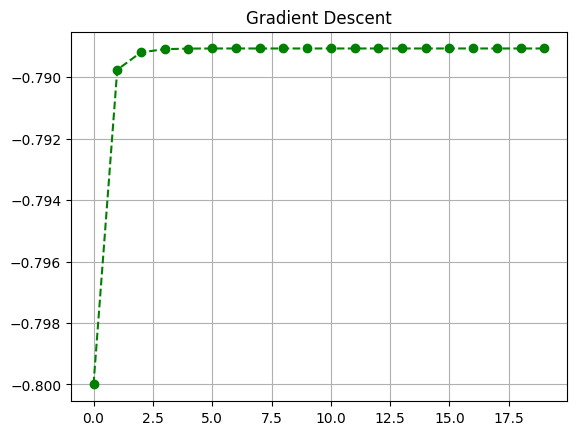

In [35]:
plt.plot(history, steps, marker='o', linestyle='--', color='g')
plt.grid()
plt.title("Gradient Descent")

In [17]:
final_value = adaptivelearningRate(gradients[-1][1])
final_value

-3.800280585573832

## **Minimizing a Real-Life LossFunction** 

In [24]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)/1000

In [19]:
def hypothesis (theta0, theta1, x):
    return theta0 + theta1 * x

In [45]:
def gradient_descent (X, y_true, initialTheta0, initialTheta1, learning_rate, num_iterations):
    
    theta0 = initialTheta0
    theta1 = initialTheta1
    
    gradients = []
    MSE = []
    for i in range(num_iterations):
        m = len(X)
        h = theta0 + theta1 * X
        
        newTheta0 = (2/m) * np.sum(h - y_true)
        newTheta1 = (2/m) * np.sum((h - y_true)*X)
        
        theta0 = theta0 - learning_rate * newTheta0
        theta1 = theta1 - learning_rate * newTheta1
        
        mse = (1/m) * np.sum((h - y_true)**2)
        MSE.append(mse)   
        gradients.append([theta0, theta1])
    return gradients, MSE

In [51]:
initial_x = 0
learning_rate = 0.1
num_iterations = 1000

gradients, mse = gradient_descent(X, y, 0, 0, learning_rate, num_iterations)
gradients[-1]

[2.00021561131078, 2.9995392086698587]

In [53]:
print("MSE: ", mse[-1])
print("MSE: ", np.sum(mse))

MSE:  8.065846587774605e-07
MSE:  36.032295106591846


In [42]:
theta0 = [row[0] for row in gradients]
theta0 = [row[1] for row in gradients]

In [44]:
# plt.plot(theta0, theta0, marker='o', linestyle='--', color='g')
# plt.grid()
# plt.title("Gradient Descent")